In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs

In [2]:
# Read in data catalog

df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [3]:
# Find sea surface temperature

df_tos = df.query("activity_id=='CMIP' & table_id == 'Omon' & variable_id == 'tos' & experiment_id == 'historical' & member_id=='r1i1p1f1'")
df_tos

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9976,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
9977,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
28719,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
32357,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827
43345,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181126
43554,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,NaN,20181129
44567,CMIP,MIROC,MIROC6,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/...,NaN,20181212
45844,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/histor...,NaN,20181218
59298,CMIP,NCAR,CESM2,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
59347,CMIP,NCAR,CESM2,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308


In [4]:
df_ts = df_tos.drop_duplicates('source_id').head(20)
df_ts

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9976,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
28719,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
32357,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827
43345,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181126
43554,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,NaN,20181129
44567,CMIP,MIROC,MIROC6,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/...,NaN,20181212
45844,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/histor...,NaN,20181218
59298,CMIP,NCAR,CESM2,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
68262,CMIP,SNU,SAM0-UNICON,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/SNU/SAM0-UNICON/historic...,NaN,20190323
69870,CMIP,NASA-GISS,GISS-E2-1-H,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/hi...,NaN,20190403


In [28]:
# View one dataset - IPSL dataset

gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ts.zstore.values[1]

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:         (y: 332, x: 362, nvertex: 4, time: 1980, axis_nbounds: 2)
Coordinates:
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T...
    time_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    area            (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    tos             (time, y, x) float32 dask.array<chunksize=(252, 332, 362), meta=np.ndarray>
Attributes: (12/54)
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  historical
    NCO:                    "4.6.0"
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    tracking_id:            hdl:21.14100/01f4d96a-9054-4974-b8dd-4f91e73989d2
    variable_id:            tos
    variant_label:          r1i1p1f1
    status:                 2019-11-10;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/01f4d96a-9054-4974-b8dd-4f91e73989d2
    version_id:             v20180803

In [35]:
# IPSL dataset causing problems - skip for now
df_ts = df_ts.drop(index=28719)
df_ts

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9976,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
32357,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827
43345,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181126
43554,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,NaN,20181129
44567,CMIP,MIROC,MIROC6,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/...,NaN,20181212
45844,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/histor...,NaN,20181218
59298,CMIP,NCAR,CESM2,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
68262,CMIP,SNU,SAM0-UNICON,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/SNU/SAM0-UNICON/historic...,NaN,20190323
69870,CMIP,NASA-GISS,GISS-E2-1-H,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/hi...,NaN,20190403
98632,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429


In [49]:
# View one dataset - MIROC dataset

gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ts.zstore.values[4]

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:             (y: 256, x: 360, time: 1980, bnds: 2, vertices: 4)
Coordinates:
    latitude            (y, x) float32 dask.array<chunksize=(256, 360), meta=np.ndarray>
    longitude           (y, x) float32 dask.array<chunksize=(256, 360), meta=np.ndarray>
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12...
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * x                   (x) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    x_bnds              (x, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * y                   (y) float64 -88.0 -85.75 -85.25 ... 148.6 150.5 152.4
    y_bnds              (y, bnds) float64 dask.array<chunksize=(256, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (time, y, x) float32 dask.array<chunksize=(312, 256, 360), meta=np.ndarray>
    vertices_latitude   (y, x, vertices) float32 dask.array<chunksize=(256, 360, 4), meta=np.ndarray>
    vertices_longitude  (y, x, vertices) float32 dask.array<chunksize=(256, 360, 4), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cmor_version:           3.3.2
    ...                     ...
    tracking_id:            hdl:21.14100/31c7618d-6a92-400e-8874-c1fbe41abd44...
    variable_id:            tos
    variant_label:          r1i1p1f1
    status:                 2019-11-11;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/31c7618d-6a92-400e-8874-c1fbe41abd44...
    version_id:             v20181212

In [50]:
df_ts = df_ts.drop(index=44567)
df_ts

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9976,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
32357,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827
43345,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181126
43554,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,NaN,20181129
45844,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/histor...,NaN,20181218
59298,CMIP,NCAR,CESM2,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
68262,CMIP,SNU,SAM0-UNICON,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/SNU/SAM0-UNICON/historic...,NaN,20190323
69870,CMIP,NASA-GISS,GISS-E2-1-H,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/hi...,NaN,20190403
98632,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
204252,CMIP,INM,INM-CM4-8,historical,r1i1p1f1,Omon,tos,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM4-8/historical...,NaN,20190530


In [52]:
# View one dataset - MIROC dataset

gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ts.zstore.values[4]

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (ncells: 830305, vertices: 16, time: 1980, bnds: 2)
Coordinates:
    lat        (ncells) float64 dask.array<chunksize=(830305,), meta=np.ndarray>
    lat_bnds   (ncells, vertices) float64 dask.array<chunksize=(830305, 16), meta=np.ndarray>
    lon        (ncells) float64 dask.array<chunksize=(830305,), meta=np.ndarray>
    lon_bnds   (ncells, vertices) float64 dask.array<chunksize=(830305, 16), meta=np.ndarray>
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: ncells, vertices, bnds
Data variables:
    tos        (time, ncells) float32 dask.array<chunksize=(24, 830305), meta=np.ndarray>
Attributes: (12/43)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  54421.0
    creation_date:          2018-12-18T12:00:00Z
    ...                     ...
    tracking_id:            hdl:21.14100/ace82780-25d8-499e-af0c-0d90c95189fe...
    variable_id:            tos
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/ace82780-25d8-499e-af0c-0d90c95189fe...
    version_id:             v20181218

In [53]:
df_ts = df_ts.drop(index=45844)
df_ts

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9976,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
32357,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827
43345,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181126
43554,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,NaN,20181129
59298,CMIP,NCAR,CESM2,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
68262,CMIP,SNU,SAM0-UNICON,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/SNU/SAM0-UNICON/historic...,NaN,20190323
69870,CMIP,NASA-GISS,GISS-E2-1-H,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/hi...,NaN,20190403
98632,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
204252,CMIP,INM,INM-CM4-8,historical,r1i1p1f1,Omon,tos,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM4-8/historical...,NaN,20190530
206565,CMIP,INM,INM-CM5-0,historical,r1i1p1f1,Omon,tos,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM5-0/historical...,NaN,20190610


In [55]:
# View one dataset - MIROC dataset

gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ts.zstore.values[5]

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:             (i: 320, j: 384, time: 1980, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 313 314 315 316 317 318 319
  * j                   (j) int32 0 1 2 3 4 5 6 ... 377 378 379 380 381 382 383
    latitude            (j, i) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time                (time) object 1850-01-17 00:30:00 ... 2014-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (time, j, i) float32 dask.array<chunksize=(120, 384, 320), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
Attributes: (12/50)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             standard
    branch_time_in_child:      0.0
    branch_time_in_parent:     99645.0
    cmor_version:              3.4.0
    ...                        ...
    tracking_id:               hdl:21.14100/e30c4f98-a3b5-4f5e-b461-b857c51d0...
    variable_id:               tos
    variant_label:             r1i1p1f1
    status:                    2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:       hdl:21.14100/e30c4f98-a3b5-4f5e-b461-b857c51d0...
    version_id:                v20190323

In [56]:
df_ts = df_ts.head(5)
df_ts

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9976,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
32357,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827
43345,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181126
43554,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,NaN,20181129
59298,CMIP,NCAR,CESM2,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308


In [57]:
# this only needs to be created once
# From Ryan Abernathy's tutorial - Way 2
gcs = gcsfs.GCSFileSystem(token='anon')
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

# Regridding
new_lats=np.arange(-87,88,2)

#time index to assign model times to
new_time_index=pd.date_range(start='1851-01-01',freq='M',periods=2988)
    
dset_list = []
for zstore in df_ts.zstore.unique():
    # make a nice concise name from the zstore value
    name = zstore.split('gs://cmip6/CMIP6/')[1].replace('/','.')[:-1]
    print(name)
    ds = xr.open_zarr(fs.get_mapper(zstore),consolidated=True)
    if 'lon' in list(ds.coords):
        ds_tos = ds.tos.mean('lon') # Last time available (2014?), taking the mean over the longitude
    elif 'longitude' in list(ds.coords):
        ds_tos = ds.tos.mean('longitude')
    ds_tos = ds_tos.interp(lat=new_lats)
    #print(dict(ds.dims))
    ds_tos['name'] = name # Creating a new dimension for each ensemble member
    dset_list.append(ds_tos)


CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.tos.gr.v20180701
CMIP.NASA-GISS.GISS-E2-1-G.historical.r1i1p1f1.Omon.tos.gn.v20180827
CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126
CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.Omon.tos.gn.v20181129
CMIP.NCAR.CESM2.historical.r1i1p1f1.Omon.tos.gr.v20190308


In [58]:
print(dset_list)

[<xarray.DataArray 'tos' (time: 1980, lat: 88)>
dask.array<dask_aware_interpnd, shape=(1980, 88), dtype=float32, chunksize=(120, 88), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
    name     <U65 'CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.tos.gr.v2..., <xarray.DataArray 'tos' (time: 1980, lat: 88)>
dask.array<dask_aware_interpnd, shape=(1980, 88), dtype=float32, chunksize=(963, 88), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
    name     <U68 'CMIP.NASA-GISS.GISS-E2-1-G.historical.r1i1p1f1.Omon.tos.gn..., <xarray.DataArray 'tos' (time: 1980, lat: 88)>
dask.array<dask_aware_interpnd, shape=(1980, 88), dtype=float32, chunksize=(120, 88), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) obje

In [59]:
tos_ds = xr.concat(dset_list, dim='name')
tos_ds

<xarray.DataArray 'tos' (name: 5, time: 3960, lat: 88)>
dask.array<concatenate, shape=(5, 3960, 88), dtype=float32, chunksize=(1, 241, 88), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-15 12:59:59.999997 ... 2014-12-16 12:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * name     (name) <U68 'CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.to...

In [65]:
histsst_past = tos_ds.sel(time=slice('1850','1870')).mean('time').mean('name')
histsst_past

<xarray.DataArray 'tos' (lat: 88)>
dask.array<mean_agg-aggregate, shape=(88,), dtype=float32, chunksize=(88,), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

In [66]:
histsst_recent = tos_ds.sel(time=slice('1994','2014')).mean('time').mean('name')
histsst_recent

<xarray.DataArray 'tos' (lat: 88)>
dask.array<mean_agg-aggregate, shape=(88,), dtype=float32, chunksize=(88,), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

In [67]:
histsst_past.load()
histsst_recent.load()

<xarray.DataArray 'tos' (lat: 88)>
array([        nan,         nan,         nan,         nan,         nan,
       -1.3634382 , -1.4800081 , -1.4036083 , -1.2897538 , -1.15015   ,
       -0.94229543, -0.58538586,  0.10749558,  0.92827827,  1.8708614 ,
        2.966863  ,  4.088288  ,  5.1499224 ,  6.3373146 ,  7.6383567 ,
        9.065699  , 10.611565  , 12.309157  , 14.085017  , 15.6978655 ,
       17.137383  , 18.383905  , 19.526922  , 20.656895  , 21.656754  ,
       22.580912  , 23.34934   , 24.037956  , 24.792366  , 25.498295  ,
       26.138636  , 26.867102  , 27.460058  , 27.898993  , 28.211338  ,
       28.506275  , 28.5654    , 28.302109  , 27.925476  , 28.007044  ,
       28.521832  , 28.77158   , 28.771826  , 28.548883  , 28.179983  ,
       27.838318  , 27.491278  , 27.074392  , 26.622635  , 26.070965  ,
       25.392254  , 24.713276  , 23.758566  , 22.649939  , 21.559757  ,
       20.558481  , 19.449179  , 18.241138  , 16.766909  , 15.128087  ,
       13.133392  , 11.062822  ,  9.284333  ,  8.11941   ,  7.437317  ,
        6.631452  ,  6.105266  ,  5.256153  ,  4.5621443 ,  4.2610435 ,
        4.0501394 ,  3.1432636 ,  1.5199206 ,  0.46742862, -0.11227639,
       -0.5889343 , -0.99803495, -1.2808731 , -1.4896643 , -1.6087649 ,
       -1.6613033 , -1.6758925 , -1.6730454 ], dtype=float32)
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

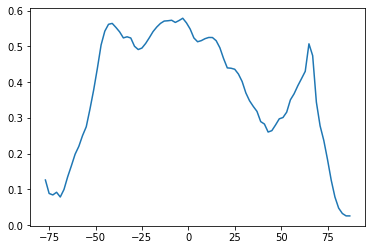

In [68]:
deltasst = histsst_recent - histsst_past
plt.plot(histsst.lat,deltasst)
